## Lending Club Case Study 

Lending Club Case study is mainly about understanding of risk analytics area in banking and financial services. The goal of this project is to analyse the given dataset and derive insights about the risk of losing money when lending to customers.
  

#### Problem Statement 

The data being analysed in this case study is related to consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a "loss of business" to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a "financial loss" for the company

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate. 

In [1]:
## Import the reuquired python modules
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

## Import the plotting libraries
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sns
sns.set_theme()

In [2]:
## Load the dataset and check the shape , first five rows of dataset
loandf = pd.read_csv("loan.csv",low_memory=False)
print(loandf.shape)
loandf.head(3)

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
### Read the data dictionary 
df1 = pd.read_excel("Data_Dictionary.xlsx",sheet_name="LoanStats",index_col='LoanStatNew',usecols=[0,1]) 
pd.set_option('display.max_colwidth', None)
df1.head(3)

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application


## Data Understanding 

- All data quality issues are correctly identified and reported. 

- The meanings of the variables are correctly interpreted and written either in the comments or text.


#### Drop Columns with null values

As a first step let us drop the columns which have all the null values and does not provide any insights.

In [4]:
## Drop the columns with all null values
loandf.dropna(axis=1,how='all',inplace=True)

In [5]:
## Check the shape of the dataframe after dropping null columns
print(loandf.shape)

(39717, 57)


In [6]:
## Now check for null values across columns
loandf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [7]:
## Drop columns with >50% of null values to avoid bias
loandf.dropna(axis=1,thresh=len(loandf)/2,inplace=True)

In [8]:
## Check the shape 
loandf.shape

(39717, 54)

In [9]:
## Review the remaining columns having only single values or fully unique values which are not useful for analyis 
for i in loandf.columns :
    uniqvals = len(loandf[i].unique())
    print(i,"  ",uniqvals)

id    39717
member_id    39717
loan_amnt    885
funded_amnt    1041
funded_amnt_inv    8205
term    2
int_rate    371
installment    15383
grade    7
sub_grade    35
emp_title    28821
emp_length    12
home_ownership    5
annual_inc    5318
verification_status    3
issue_d    55
loan_status    3
pymnt_plan    1
url    39717
desc    26528
purpose    14
title    19616
zip_code    823
addr_state    50
dti    2868
delinq_2yrs    11
earliest_cr_line    526
inq_last_6mths    9
open_acc    40
pub_rec    5
revol_bal    21711
revol_util    1090
total_acc    82
initial_list_status    1
out_prncp    1137
out_prncp_inv    1138
total_pymnt    37850
total_pymnt_inv    37518
total_rec_prncp    7976
total_rec_int    35148
total_rec_late_fee    1356
recoveries    4040
collection_recovery_fee    2616
last_pymnt_d    102
last_pymnt_amnt    34930
last_credit_pull_d    107
collections_12_mths_ex_med    2
policy_code    1
application_type    1
acc_now_delinq    1
chargeoff_within_12_mths    2
delinq_amnt   

#### Drop the columns which does not have any relation with target column loan_status

* The list includes columns with only single value 
* Columns like id,memberid,url which are unique for every transaction 
* Categorical columns having lot of unique values like emp_title

'id','member_id','pymnt_plan','emp_title','url','desc',"zip_code",'initial_list_status','policy_code',
'application_type','acc_now_delinq','delinq_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','title'

In [10]:
## Drop the columns which does not have any relation with the target column we want to analyse
loandf.drop(columns=['id','member_id','pymnt_plan','emp_title','url','desc',"zip_code",'initial_list_status','policy_code','application_type','title','acc_now_delinq','delinq_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],inplace=True)


In [11]:
## Check the final shape that needs to be analysed
loandf.shape

(39717, 38)

In [12]:
## Check the Meaning of the remaining columns from teh data dictionary
l1=[x for x in loandf.columns]

df1.loc[l1,]

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


####  List of "customer attributes" and "loan attributes" we are considering for analysing loan defaulter behaviour.

**Consumer Attributes 

emp_length - Employee Experience

emp_title - Employee Title/current company  

home_ownership

annual_inc  - Annual income of employee

addr_state  - State of the Employee 

dti - ratio of the current monthly debt repayments

delinq_2year - number of times the employee delayed payment more than 30+ days

open_acc  - number of open loan accounts 

pub_rec , pub_rec_bankruptcies -  Loan should not be issued or issued with higher interest in case of history of bankruptcy

**Loan attributes 

funded_amnt - we will use this column as this reflects the actual sanctioned/committed amount

funded_amnt_inv - Amount committed/released by investors for this specific loan

installment   - Installment amount 

Term of loan  - Tenure of loan

grade,sub_grade - Based on loan grade   

purpose   

issue_d    

verification_status

revol_bal    

revol_util   - Revolving credit utiltization (using bucketing)

inq_last_6mths  - Number of credit enquiries by various lenders in last 6months. 

In [13]:
## Based on above facts we can futher drop these columns as they look redundant and not related to 
## total_pymnt_inv,out_prncp_inv,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d

loandf.drop(columns=['total_pymnt_inv','out_prncp_inv','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],inplace=True)



## Data Cleaning and Manipulation

- Data quality issues are addressed in the right way (missing value imputation, outlier treatment and other kinds of data redundancies, etc.). 

- If applicable, data is converted to a suitable and convenient format to work with using the right methods.

- Manipulation of strings and dates is done correctly wherever required.




#### Incorrect Data Types:
- Clean and convert the column to right data type (numeric , float or date)
- Fix the values to in the column from string to numeric like interest_rate

In [14]:
loandf.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,83.70%,9,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,9.40%,4,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,98.50%,10,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,21%,37,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,53.90%,38,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,0.0


In [15]:
loandf.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
total_pymnt                float64
total_rec_prncp            float64
total_rec_int       

##### Fix the data in int_rate,term,emp_length, revol_util and convert to right data type

##### Convert issued_d ,earliest_cr_line  to date object 

In [16]:
## Clean the interest rate column to take off the % and convert to float

def cleandata(vals):
     return  str(vals).replace('<','').replace(',','').replace('%','')

loandf['int_rate'] = loandf['int_rate'].apply(cleandata)
loandf['int_rate'] = loandf['int_rate'].astype(float)
print(loandf.int_rate.head())
print(loandf.int_rate.describe())

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64
count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64


In [17]:
### Clean the term of loan to remove months 
loandf['term']= loandf['term'].apply(lambda x: int(x[1:3]))
loandf['term']= loandf['term'].astype(int) 

In [18]:
print(loandf.term.dtype)
loandf.term.value_counts()

int32


36    29096
60    10621
Name: term, dtype: int64

In [19]:
## Clean the emp_length , check the values first
loandf.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [20]:
## Convert values as per defnition the possible value are 0 to 10 , 0 means less than one year , 10 for 10 or more years, nulls to 0
loandf['emp_length']=loandf['emp_length'].apply(lambda x: str(x).replace('< 1 year','0').replace(' ','').replace('years','').replace('year','').replace('+','').replace('nan','0'))
loandf['emp_length'] = loandf['emp_length'].astype(int)
print(loandf.emp_length.value_counts())
print(loandf.emp_length.describe())

10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64
count    39717.000000
mean         4.838835
std          3.605528
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


In [21]:
## Transform the revol_util from string to float 
loandf['revol_util'] = loandf.revol_util.apply(cleandata)
loandf['revol_util'] = loandf.revol_util.astype(float)
print(loandf.revol_util.value_counts())
print(loandf.revol_util.describe())

0.00     977
0.20      63
63.00     62
0.10      58
40.70     58
        ... 
49.63      1
58.77      1
0.04       1
21.72      1
37.73      1
Name: revol_util, Length: 1089, dtype: int64
count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64


In [22]:
## Convert earliest_cr_line which indicates the last date the line of credit is opened for given user
loandf.loc[:,['earliest_cr_line','issue_d']].head(3)

,earliest_cr_line,issue_d
0,Jan-85,Dec-11
1,Apr-99,Dec-11
2,Nov-01,Dec-11


In [23]:
## Convert all the columns with dates to datetime object
loandf['issue_d']=pd.to_datetime(loandf.issue_d,format="%b-%y")
loandf['earliest_cr_line'] = pd.to_datetime(loandf.earliest_cr_line,format="%b-%y")

## Check the columns after conversion
loandf.loc[:,['earliest_cr_line','issue_d']].head(3)

,earliest_cr_line,issue_d
0,1985-01-01,2011-12-01
1,1999-04-01,2011-12-01
2,2001-11-01,2011-12-01


In [24]:
## Review final list of null values
loandf.isnull().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
out_prncp                    0
total_pymnt                  0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
pub_rec_

In [25]:
### Dropping the remaining insignificant null value rows and storing cleaned dataframe
df2 = loandf.dropna()
df2.reset_index(inplace=True,drop=True)
print(df2.isnull().sum())
print(df2.info())

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
pub_rec_bankruptcies       0
dtype: int64
<class 'pandas.core.frame.Data

### Outlier treatment for the loan parameters

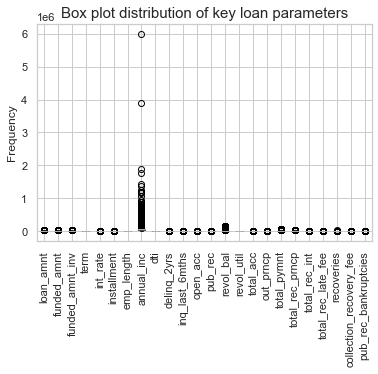

In [30]:
## Draw box plot for all the numeric variables
sns.set_style('whitegrid')
df2.boxplot()
plt.title("Box plot distribution of key loan parameters",fontdict={'fontsize':15})
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

#### From the above graph it is clear that annual income column needs outlier treatment

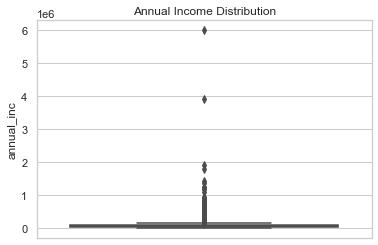

In [31]:
## Check box plot of annual income
plt.title("Annual Income Distribution")
plt.ylabel('Annual Income')
sns.boxplot(data=df2,y='annual_inc')
plt.show()

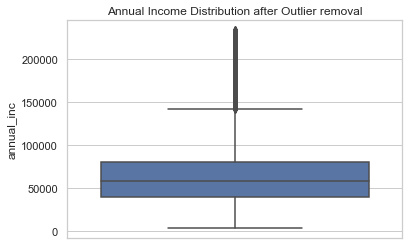

(38580, 33)


count     38580.000000
mean      65603.447698
std       35149.065482
min        4000.000000
25%       40249.000000
50%       58320.000000
75%       81000.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [32]:
### To minimize the loss of data , experiemented with 99.7 to 95th percentile. 
## Dropping only the top 1 precentile annual income which is around 300 rows
p99 = df2['annual_inc'].quantile(0.99)
temp = df2 [ df2['annual_inc'] < p99 ]
plt.title("Annual Income Distribution after Outlier removal")
sns.boxplot(data=temp,y='annual_inc')
plt.show()
print(temp.shape)
temp.annual_inc.describe()

In [33]:
### Assign the trimmed dataframe
df2=temp

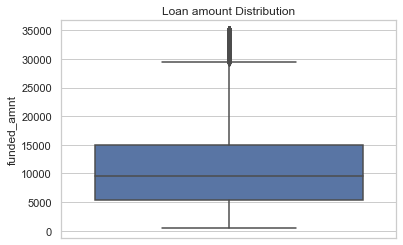

count    38580.000000
mean     10892.888802
std       7121.503578
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [34]:
## Check the distribution of other key variable funded_amnt column
plt.title("Loan amount Distribution")
sns.boxplot(y='funded_amnt',data=df2)
plt.show()
df2.funded_amnt.describe()

Note:- The distribution of funded amount looks fine and the mean & median values are almost close so no need to take any further action.

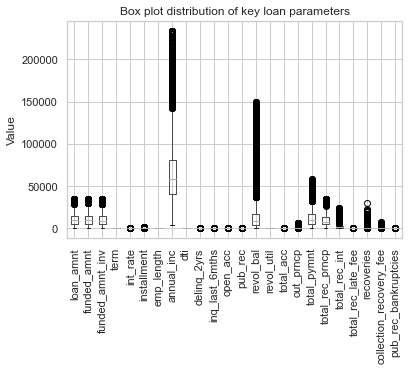

In [35]:
## Check the boxplot distribution once again

df2.boxplot()
plt.title("Box plot distribution of key loan parameters")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

##### Though  we still have outliers in annual_inc , revolv_bal we can handle the impact of them during the data analysis  instead of dropping the rows altogether

In [36]:
## Check the shape after cleaning data
df2.shape

(38580, 33)

## Data analysis 


### Univariate Analysis 

From the final list of variables we wil perform univariate analysis for both categorical and continuous variabls

- Quantitative variables 

funded_amnt 

installment

annual_income 

revol_util


- Categorical variables 

verification_status 

Home ownership 

Grade 

Subgrade 

purpose

issued_year

Term of loan



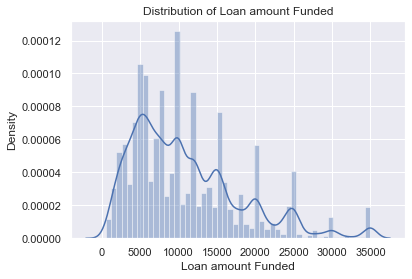

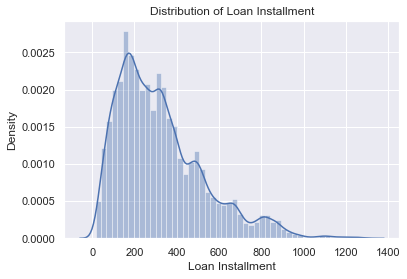

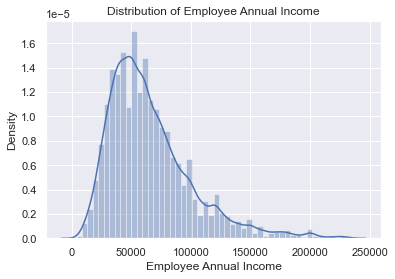

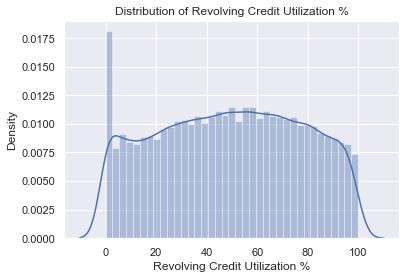

In [273]:
names={'funded_amnt':"Loan amount Funded" , 
       'installment':"Loan Installment",
       'annual_inc':'Employee Annual Income',
       'revol_util':'Revolving Credit Utilization %',
        'revol_bal': 'Total Revolving Credit Balance',
        'open_acc': "Active Credit accounts",
        'pub_rec': 'Public Insolvency Records',
         'int_rate': "Interest Rate",
          'dti' : "Debt to Income Ratio",
          'delinq_2yrs': "Delinquency incidents of 30+ days in 2 years"}
for i in ['funded_amnt','installment','annual_inc','revol_util']:
    chart_name = "Distribution of "+names[i]
    plt.title(chart_name)
    plt.xlabel(names[i])
    ax = sns.distplot(df2[i])
    ax.set(xlabel=names[i])
    plt.show()

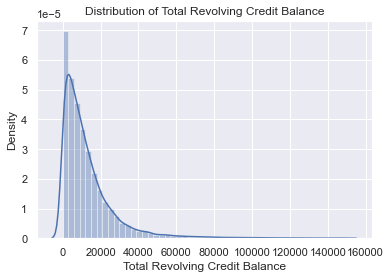

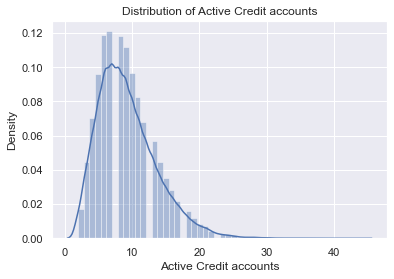

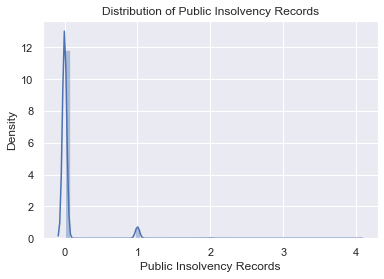

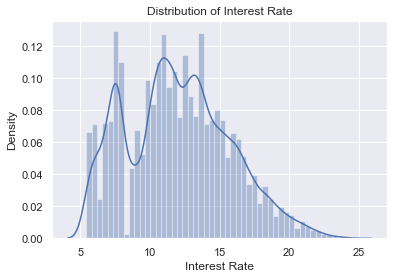

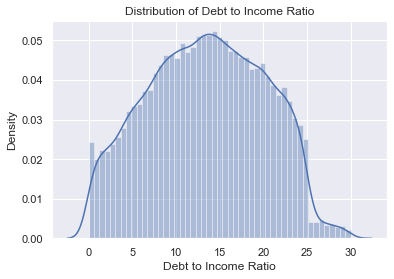

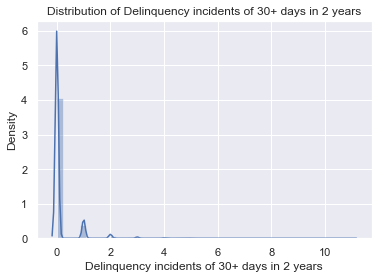

In [274]:
for i in ['revol_bal','open_acc','pub_rec','int_rate','dti','delinq_2yrs']:
    chart_name = "Distribution of "+names[i]
    plt.title(chart_name)
    plt.xlabel(names[i])
    ax = sns.distplot(df2[i])
    ax.set(xlabel=names[i])
    plt.show()

### Inferences 

Key observations from the above plots we can infer the following 

* Average size of loans issued were small loans between \\$5000 to $10000  

* Average installment size is \\$200

* The average income of the borrowers between \\$50k  to  $60k

* Loans were issued irrespective of revolving credit utilization, however chances of loan approval is high to borrowers who has not used or (0%) revolving credit usage  

* With increase of revolving credit balance decreases the chance of loan approval 

* Majority of loans were given to employers with dti ratio of 10 to 20


In [42]:
## We can analyse the loan issued based on year of issue and month of issue, so lets split these
df2['issue_year']=pd.DatetimeIndex(df2['issue_d']).year
df2['issue_month'] = pd.DatetimeIndex(df2['issue_d']).month
### Similary for earliest credit line split the year 
df2['earliest_cr_line_year'] = pd.DatetimeIndex(df2['earliest_cr_line']).year

In [287]:
### Categorical Variables 
cat_names = {'addr_state':"State of Borrower",
             "grade" : "Loan Grade ",
             'sub_grade':"Loan Sub Grade",
             'verification_status':'Employee Verification Status',
             'home_ownership':'Home Ownership',
             'issue_year':"Loan Issued Year",
             'issue_month':'Loan Issued Month',
             'purpose':"Loan Purpose" , 
              'emp_length':"Experience of Employee",
             'loan_status': "Loan Status",
              'term' : 'Loan Tenure'}
sns.set_theme()

## Custom function for plotting categorical data

def plot_countplot(col,figxsize,figysize,titlesize,xlabelsize):
    plt.figure(figsize=(figxsize,figysize))
    plt.xticks(rotation=90)
    ax = sns.countplot(x=col,data=df2)
    title="Loans Distribution by "+cat_names[col]
    plt.title(title,fontdict={'fontsize':titlesize})
    plt.xlabel(cat_names[col],fontdict={'fontsize':xlabelsize})
    plt.show()

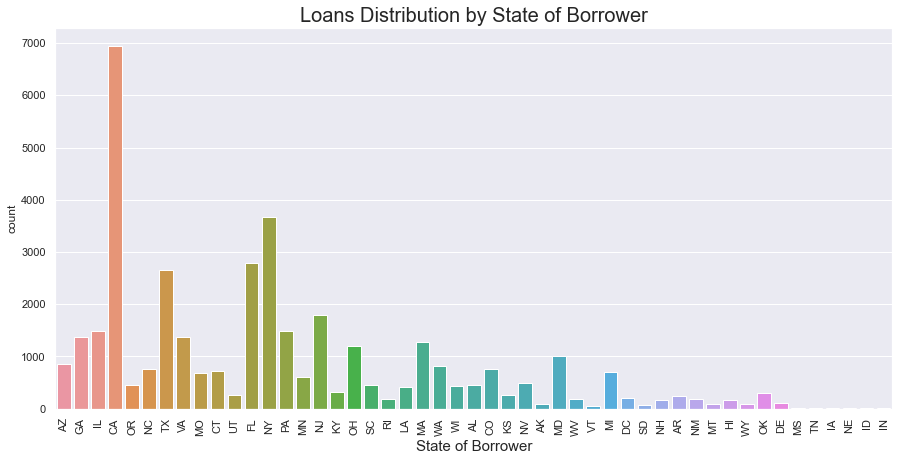

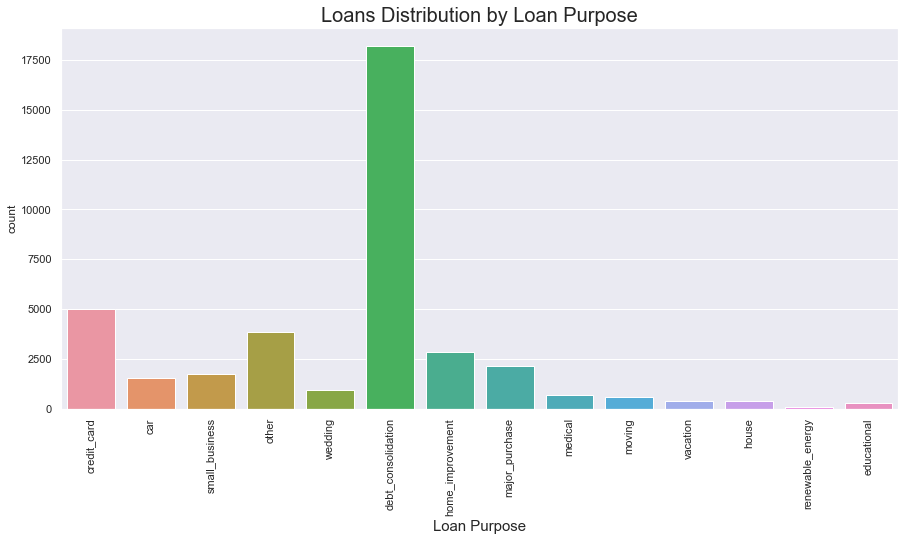

In [80]:
plot_countplot('addr_state',15,7,20,15)
plot_countplot('purpose',15,7,20,15)


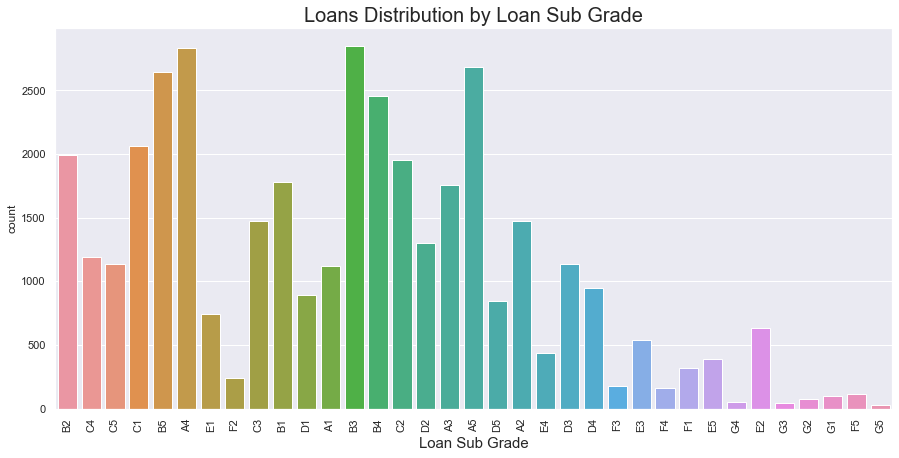

B3    2848
A4    2837
A5    2688
B5    2647
B4    2456
C1    2060
B2    1992
C2    1954
B1    1777
A3    1760
C3    1474
A2    1470
D2    1302
C4    1193
C5    1139
D3    1135
A1    1121
D4     944
D1     890
D5     846
E1     743
E2     634
E3     536
E4     439
E5     389
F1     318
F2     240
F3     176
F4     159
F5     111
G1     100
G2      74
G4      53
G3      47
G5      28
Name: sub_grade, dtype: int64

In [113]:
plot_countplot('sub_grade',15,7,20,15)
df2.sub_grade.value_counts()

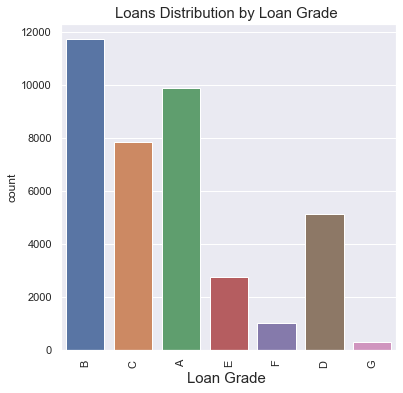

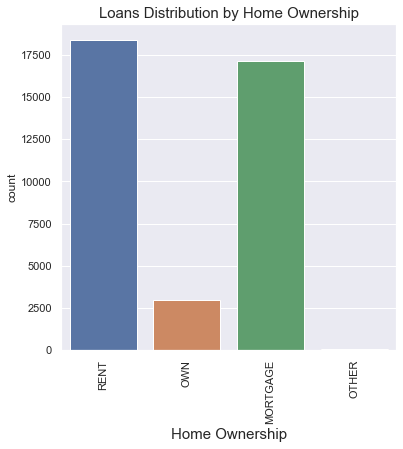

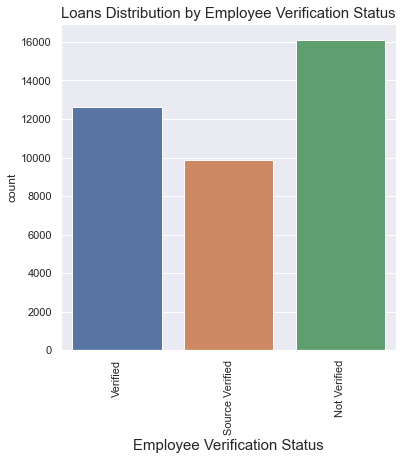

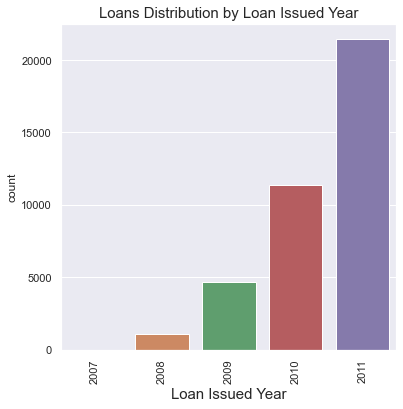

In [133]:
plot_countplot('grade',6,6,15,15)
plot_countplot('home_ownership',6,6,15,15)
plot_countplot('verification_status',6,6,15,15)
plot_countplot('issue_year',6,6,15,15)

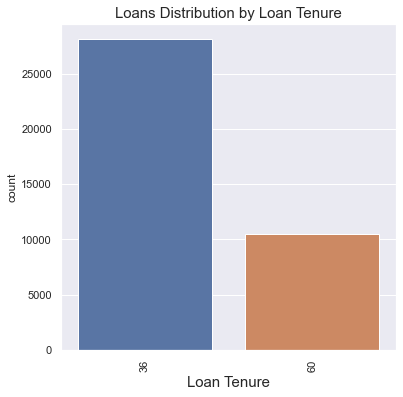

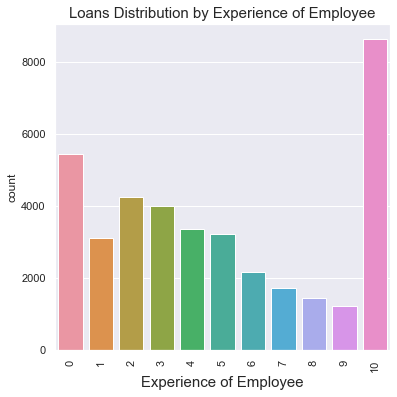

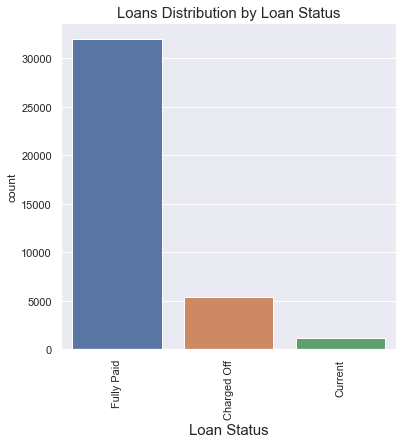

Fully Paid     32002
Charged Off     5452
Current         1126
Name: loan_status, dtype: int64

In [288]:
plot_countplot('term',6,6,15,15)
plot_countplot('emp_length',6,6,15,15)
plot_countplot('loan_status',6,6,15,15)
df2.loan_status.value_counts()

### Key observations from Univariate analysis on Categorical variables

* <b> Majority loans were issued to following states</b>

1. CA - California
2. NY - NewYork
3. FL - Florida
4. TX - Texas 

- <b> Borrowers took loans predominantly for reasons </b>

1. Debt consolidation 
2. Credit card payments
3. Home improvements
4. Cover any major purchases and other expenses. 
5. Nominal exposure to borrowers requiring capital for small business 

- <b>Majority of loans issued to borrowers with >= 10 years experience , followed by freshers or less than 1year experience folks.</b>

- Borrowers were issued Loans of loan grades in the order B, A, C, D, E, F, G 

- Top 5 subgrades of loans that are issued also belong to B&A category

1.  B3    2848
2.  A4    2837
3.  A5    2688
4.  B5    2647
5.  B4    2456

- Borrowers with living in rental or mortgage homes took mojority of loans

- <b>Lending Club issued highest number of loans without Veritication.</b>

- <b> A total of 16% of loans issued by lending club got defaulted(charged_off) </b>

- <b> Maximum number of loans issued in 2010 and 2011 </b>


# Segmented Univariate Analysis 

To analyse the loan default probability , the target column <b>loan_status</b> forms he basis for our analysis.

We will try to answer some of the following questions from this analysis 
    
  
1) Which states have highest defaulter ?
   
2) Is there a pattern in loan default with respect to year of issue ? 

3) Chances of default based on interest rate ?
   
4) Dependecy on revolving credit % on defaulters ?

5) Distribution of loan amounts in case of defaulter and non-defaulters ? 

6) Effect of dti , delinq_2yrs on loan issue and defaulter ?  

In [108]:
## Now segment the data based on target variable loan_status 
print(df2.loan_status.value_counts())
df_paid = df2[df2['loan_status']=='Fully Paid']
df_def = df2[df2['loan_status']=='Charged Off']

Fully Paid     32002
Charged Off     5452
Current         1126
Name: loan_status, dtype: int64


In [167]:
### Continuous variables 
names

{'funded_amnt': 'Loan amount Funded',
 'installment': 'Loan Installment',
 'annual_inc': 'Employee Annual Income',
 'revol_util': 'Revolving Credit Utilization %',
 'revol_bal': 'Total Revolving Credit Balance',
 'open_acc': 'Active Credit accounts',
 'pub_rec': 'Public Insolvency Records',
 'int_rate': 'Interest Rate',
 'dti': 'Debt to Income Ratio'}

In [154]:
## Categorical Variables
cat_names

{'addr_state': 'State of Borrower',
 'grade': 'Loan Grade ',
 'sub_grade': 'Loan Sub Grade',
 'verification_status': 'Employee Verification Status',
 'home_ownership': 'Home Ownership',
 'issue_year': 'Loan Issued Year',
 'issue_month': 'Loan Issued Month',
 'purpose': 'Loan Purpose',
 'emp_length': 'Experience of Employee',
 'loan_status': 'Loan Status'}

In [191]:
## Perform segmented univariate Analysis on continous variables using overlapped distplot 
## Define custom function for plotting this

def plot_seg_distplot(colname):
    fig= plt.figure(figsize=(7,7))
    title =  names[colname]+" Distribution between Fully Paid vs Defaulters"
    plt.title(title,fontdict={"fontsize":15})
    ax = sns.distplot(df_paid[colname],bins=15,color='b')
    ax2 = sns.distplot(df_def[colname],bins=15,color='r')
    ax.set(xlabel=names[colname])
    fig.legend(labels=['Fully Paid','Defaulters'],loc='center right')
    plt.show()

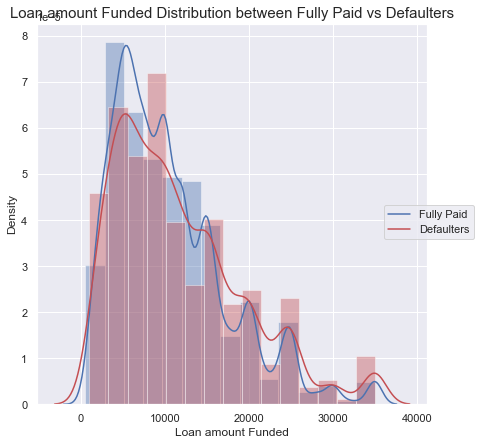

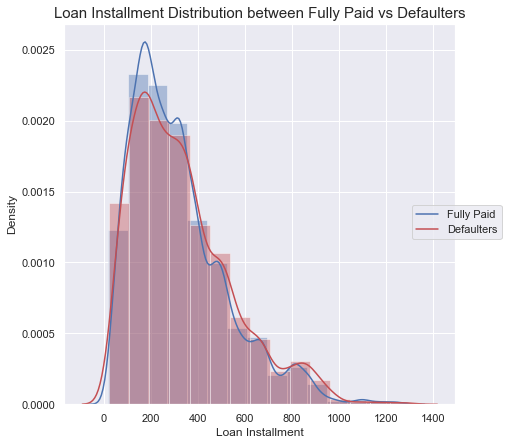

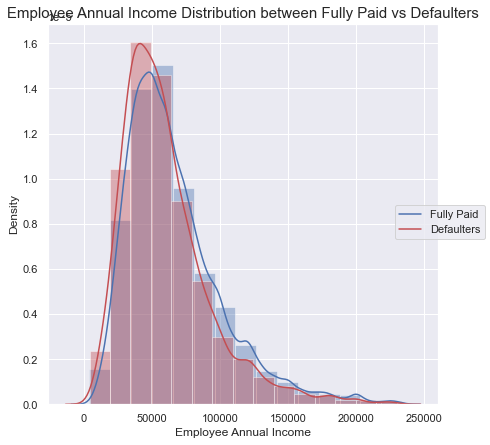

In [192]:
### First three variables 

plot_seg_distplot('funded_amnt')
plot_seg_distplot('installment')
plot_seg_distplot('annual_inc')

### Observations 

<b>

1. The more the Loan amount the more is chance of default 
    
2. Chance of default keeps decreasing with increase of Employee Annual Income 

3. Slight chances of loan default are there with increasing Installment amount

</b>|

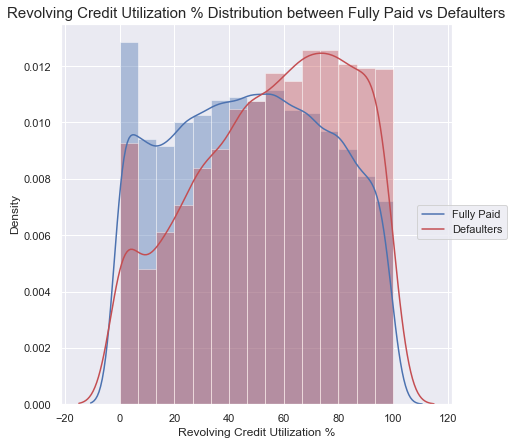

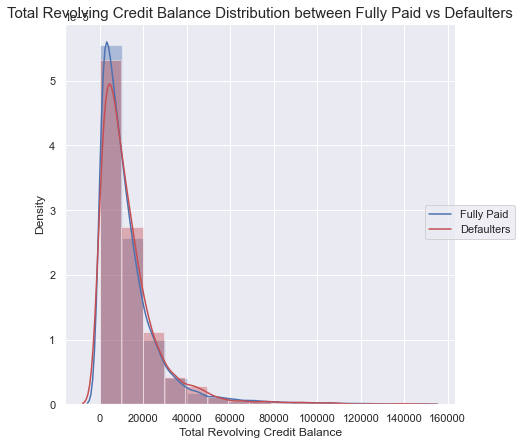

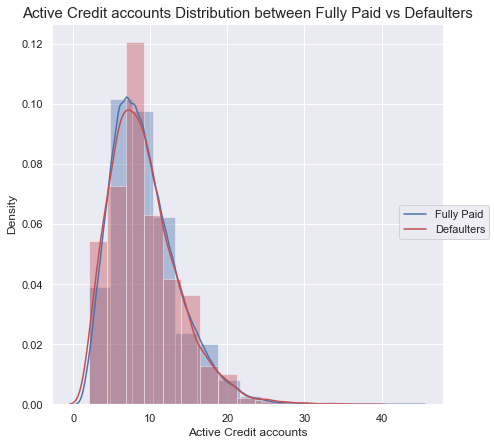

In [193]:
## Next three variables 
plot_seg_distplot('revol_util')
plot_seg_distplot('revol_bal')
plot_seg_distplot('open_acc')


### Obervations 

* The higher the revolving credit utilisation , the higher chance for default. Lending club should avoid lending to people with above 50% revolv_credit_utilisation 

* Increase chance of defaults for Employees with above 8 active open credit accounts 


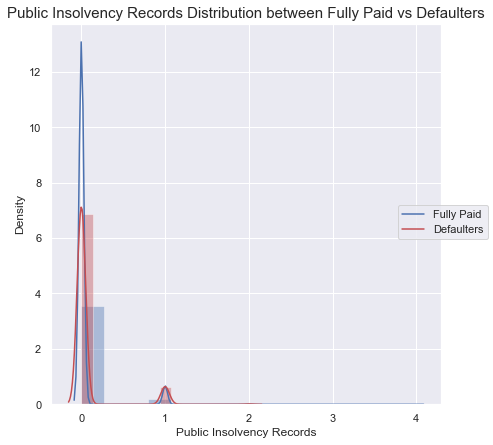

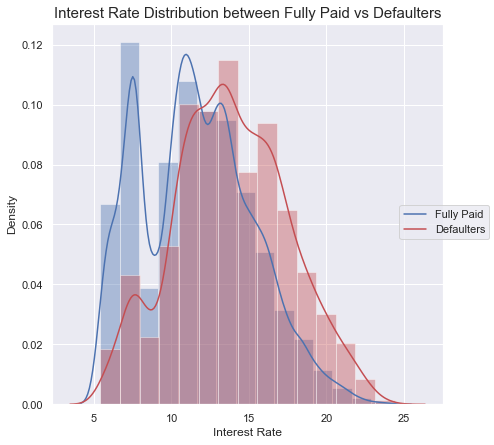

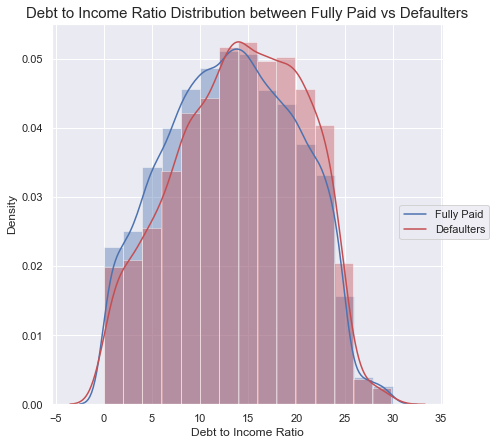

In [276]:
### Remaining variables 
plot_seg_distplot('pub_rec')
plot_seg_distplot('int_rate')
plot_seg_distplot('dti')

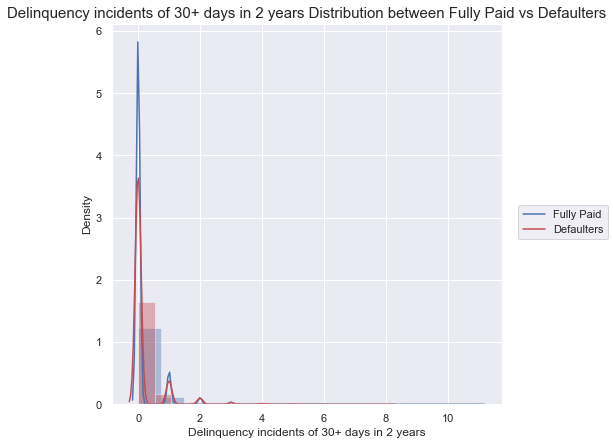

In [277]:
## Delinquency distribution 
plot_seg_distplot('delinq_2yrs')

#### Observations 

*  <b> As the interest rate of loan increases the chance of loan default is increasing. Lending club can reduce exposure to such loans. 

* Debt to Income ration of the borrower should preferably be <= 15 , Increasing debt to income ratio is leading to higher defaults </b>

* <b> Lending club should preferably not give loans to people with  Publich Insolvency Records </b>

* In case of any delinquency incidents , caution should be observed 




### Segmented univariate Analysis on Categorical variables 

In [289]:
cat_names

{'addr_state': 'State of Borrower',
 'grade': 'Loan Grade ',
 'sub_grade': 'Loan Sub Grade',
 'verification_status': 'Employee Verification Status',
 'home_ownership': 'Home Ownership',
 'issue_year': 'Loan Issued Year',
 'issue_month': 'Loan Issued Month',
 'purpose': 'Loan Purpose',
 'emp_length': 'Experience of Employee',
 'loan_status': 'Loan Status',
 'term': 'Loan Tenure'}

In [262]:
### Define custom function for plotting segmented univariate graphs

def plot_seg_categorical(colname,figxsize=7,figysize=7,xrotation=75):
    fig= plt.figure(figsize=(figxsize,figysize))
    title =  cat_names[colname]+" Distribution between Fully Paid vs Defaulters"
    plt.title(title,fontdict={"fontsize":14})
    plt.xticks(rotation=xrotation)
    ax = sns.countplot(data=df2,x=colname,hue='loan_status')
    ax.set(xlabel=cat_names[colname])

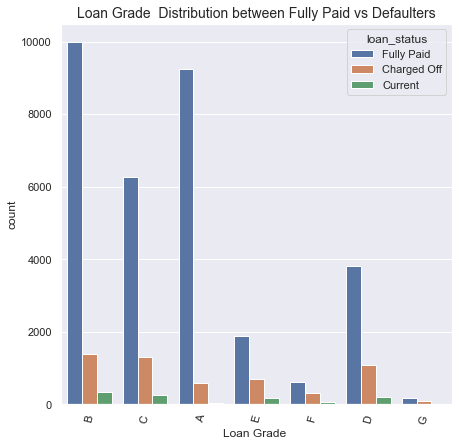

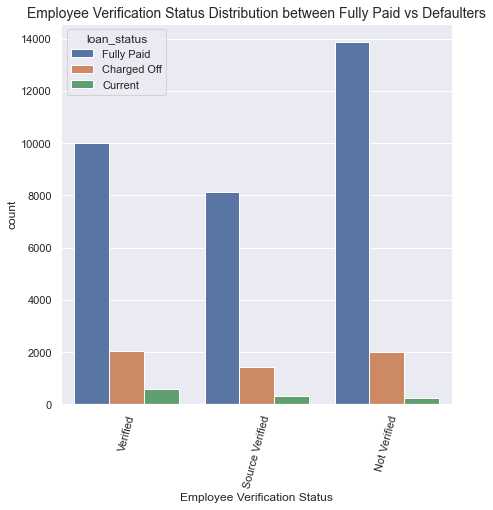

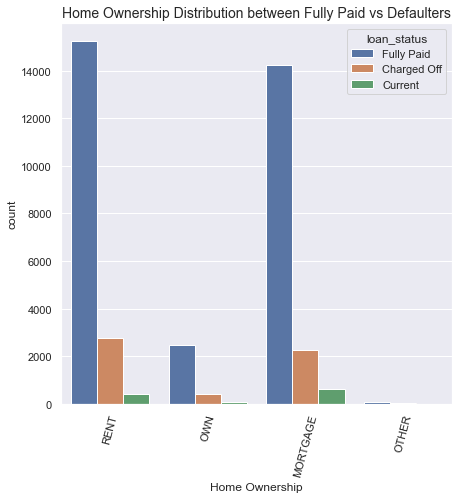

In [263]:
plot_seg_categorical('grade')
plot_seg_categorical('verification_status')
plot_seg_categorical('home_ownership')

In [280]:
## Loan verification status is not giving clear picture , need to check the distribution.
df_def.verification_status.value_counts()

Verified           2026
Not Verified       2007
Source Verified    1419
Name: verification_status, dtype: int64

### Observations 

* Loan grades B , C , D should undergo extra scrutiny 

* Loan verification status does not seem to have much correlation with loan defaults

* <b> Borrowers staying in Rent and Mortgage flats have higher percentage of loan defaults, so need to consider other parameters. </b>


Top 10 Defaulter  State of Borrower
CA    1092
FL     478
NY     475
TX     307
NJ     270
GA     208
IL     193
PA     175
VA     173
MD     154
Name: addr_state, dtype: int64
Top 10 Defaulter  Loan Sub Grade
B5    349
B3    332
B4    322
C1    322
C2    312
C3    264
D2    258
D3    246
B2    219
A5    215
Name: sub_grade, dtype: int64


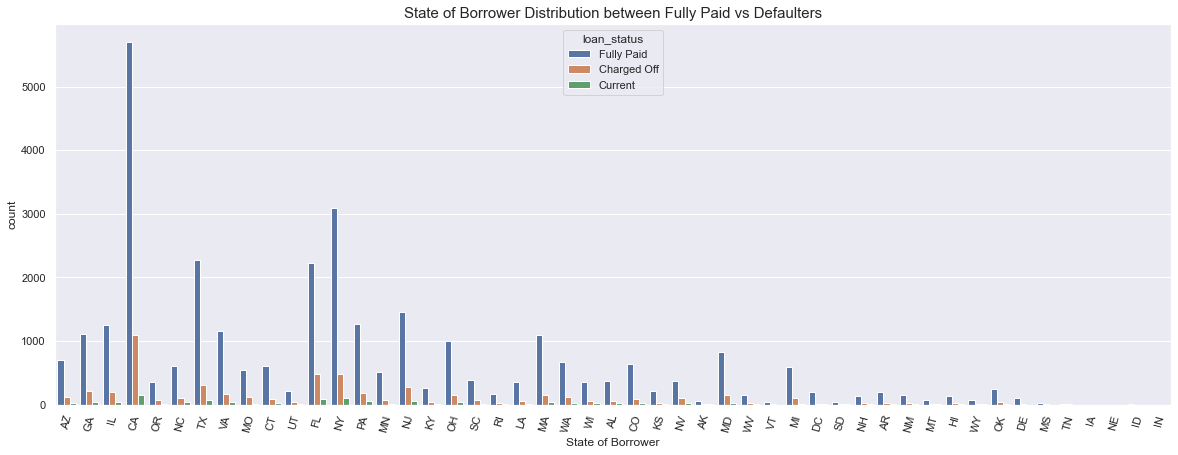

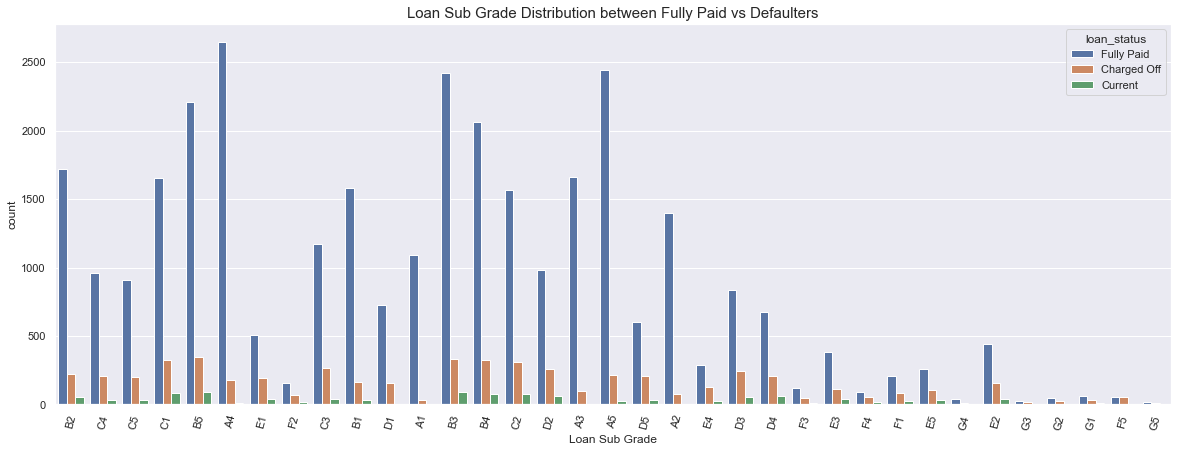

In [264]:
### Deal the addr_state and the subgrade are large columns seperately
for colname in ['addr_state','sub_grade']:
    fig= plt.figure(figsize=(20,7))
    title =  cat_names[colname]+" Distribution between Fully Paid vs Defaulters"
    plt.title(title,fontdict={"fontsize":15})
    plt.xticks(rotation=75)
    ax = sns.countplot(data=df2,x=colname,hue='loan_status')
    ax.set(xlabel=cat_names[colname])
    print("Top 10 Defaulter ",cat_names[colname])
    print(df_def[colname].value_counts().head(10))

### Obervations 

* Loan defaults are higher from these four states

1. CA  California
2. FL  Florida
3. NY  Newyork
4. TX  Texas 

* Loan default probability is higher for loan subgrades in the order  B5 , B3, B4 , C1 , C2


debt_consolidation    2696
other                  611
credit_card            528
small_business         455
home_improvement       327
major_purchase         215
car                    156
medical                104
wedding                 91
moving                  88
house                   57
vacation                53
educational             52
renewable_energy        19
Name: purpose, dtype: int64

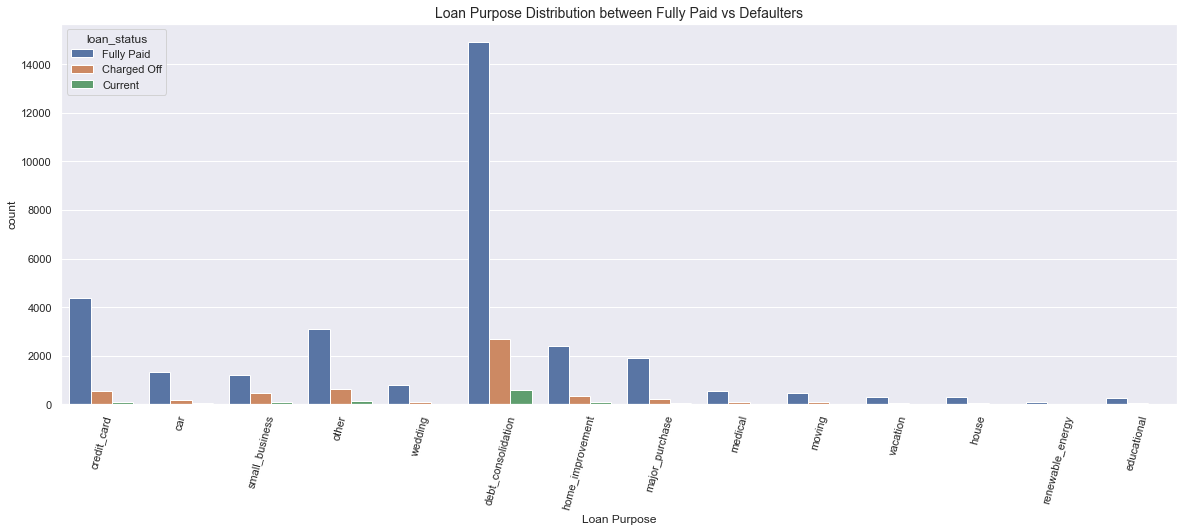

In [270]:
### Check the purpose column defaulter distribution
plot_seg_categorical('purpose',20,7)
df_def.purpose.value_counts()

<b> Borrowers stating the loan purpose for debt_consolidation and other categories have higher chances of default </b>

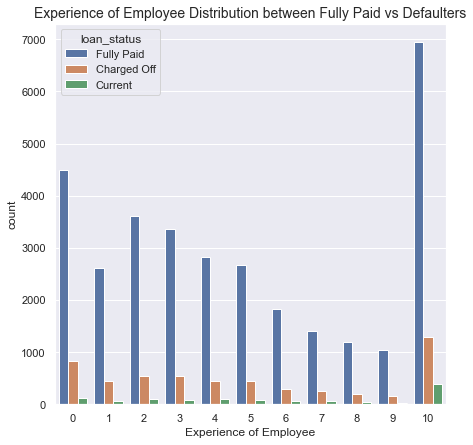

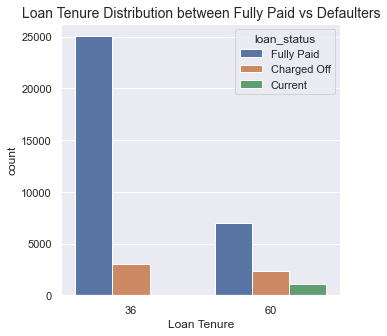

In [292]:
## Employee Length
plot_seg_categorical('emp_length',7,7,0)
plot_seg_categorical('term',5,5,0)

<b> Loan defaults are higher for 10+ years experience and freshers with 0 years experience. We should moderate lending to 10+ years of experience. </b>

### Analysis on derived variables 

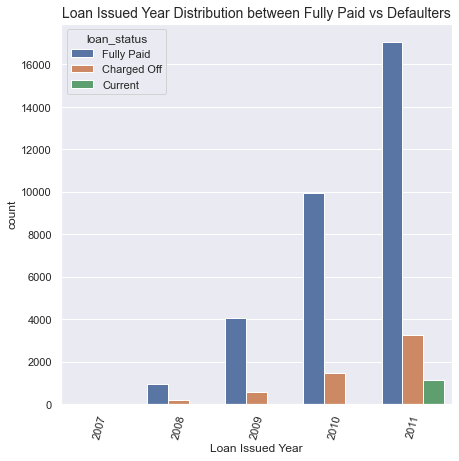

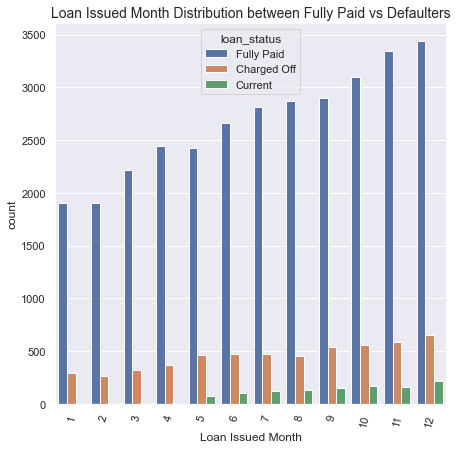

In [279]:
plot_seg_categorical('issue_year')
plot_seg_categorical('issue_month')

### Observations
<b> 
 * Loans issued in last quarter of the year have higher chance of defaults compared to other months. One inference could be to meet the year end targets loans are issued at faster pace with easier approvals </b> 

* Most number of defaults happened in 2010 and 2011. As the loans grow so are loan defaults across years. 

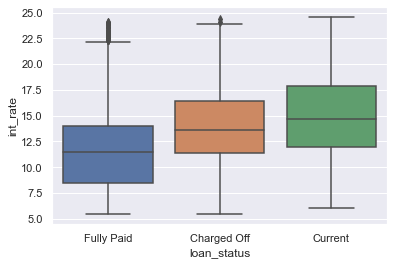

In [282]:
### Interest rate to loan repayment distribution
sns.boxplot(df2.loan_status,df2.int_rate)
plt.show()

<b>
* From this boxplot distribution we can infer that the interest rate above 14% seems to have higher chance for defaults
</b>

### Bivariate Analysis 

For the purpose of bivariate analysis we will use the correlation matrix on the defaulter dataset to understand the relation between the key loan factors.


In [147]:
## upon observing the correlation matrix the outstanding pricipal is giving all null values.
df_def.drop(columns=['out_prncp'],inplace=True)
corr_df = df_def.corr()

In [148]:
corr_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year
loan_amnt,1.000000,0.979287,0.930112,0.399337,0.355216,0.926183,0.205776,0.456059,0.069355,-0.029055,...,0.680564,0.547986,0.700815,0.091684,0.312376,0.157491,-0.027521,0.134877,0.076119,-0.168386
funded_amnt,0.979287,1.000000,0.951930,0.383369,0.358806,0.953845,0.209231,0.447854,0.066482,-0.027131,...,0.697984,0.565631,0.714249,0.098832,0.318742,0.164411,-0.032067,0.150720,0.077005,-0.159825
funded_amnt_inv,0.930112,0.951930,1.000000,0.412772,0.363575,0.892524,0.208059,0.418694,0.070650,-0.026322,...,0.700683,0.566820,0.725331,0.081961,0.309977,0.146827,-0.035227,0.268704,0.103154,-0.138260
term,0.399337,0.383369,0.412772,1.000000,0.453750,0.146170,0.144334,0.119055,0.059448,-0.007956,...,0.273117,0.100201,0.460361,-0.024507,0.133587,0.007780,0.015981,0.338462,0.053491,-0.061281
int_rate,0.355216,0.358806,0.363575,0.453750,1.000000,0.336174,0.060857,0.171618,0.036567,0.122778,...,0.267791,0.072878,0.469353,0.062671,0.161840,0.075697,0.076612,0.160853,0.072745,0.084230
installment,0.926183,0.953845,0.892524,0.146170,0.336174,1.000000,0.179523,0.455174,0.050407,-0.013870,...,0.666730,0.572519,0.633206,0.124255,0.303437,0.185187,-0.023875,0.053940,0.065618,-0.141179
emp_length,0.205776,0.209231,0.208059,0.144334,0.060857,0.179523,1.000000,0.211771,0.052039,0.009213,...,0.168854,0.139656,0.178102,-0.021191,0.063022,0.012050,0.033478,0.094049,0.012290,-0.174285
annual_inc,0.456059,0.447854,0.418694,0.119055,0.171618,0.455174,0.211771,1.000000,-0.057798,0.031531,...,0.350803,0.289029,0.335363,0.098012,0.184190,0.103724,0.007237,0.002961,0.021410,-0.225041
dti,0.069355,0.066482,0.070650,0.059448,0.036567,0.050407,0.052039,-0.057798,1.000000,-0.064726,...,0.045761,0.019080,0.069217,-0.039123,0.029194,0.008092,0.018438,0.086058,0.031587,-0.052237
delinq_2yrs,-0.029055,-0.027131,-0.026322,-0.007956,0.122778,-0.013870,0.009213,0.031531,-0.064726,1.000000,...,-0.018403,-0.038651,0.003939,0.028168,0.011945,0.020214,0.002830,0.036361,-0.026182,-0.047208


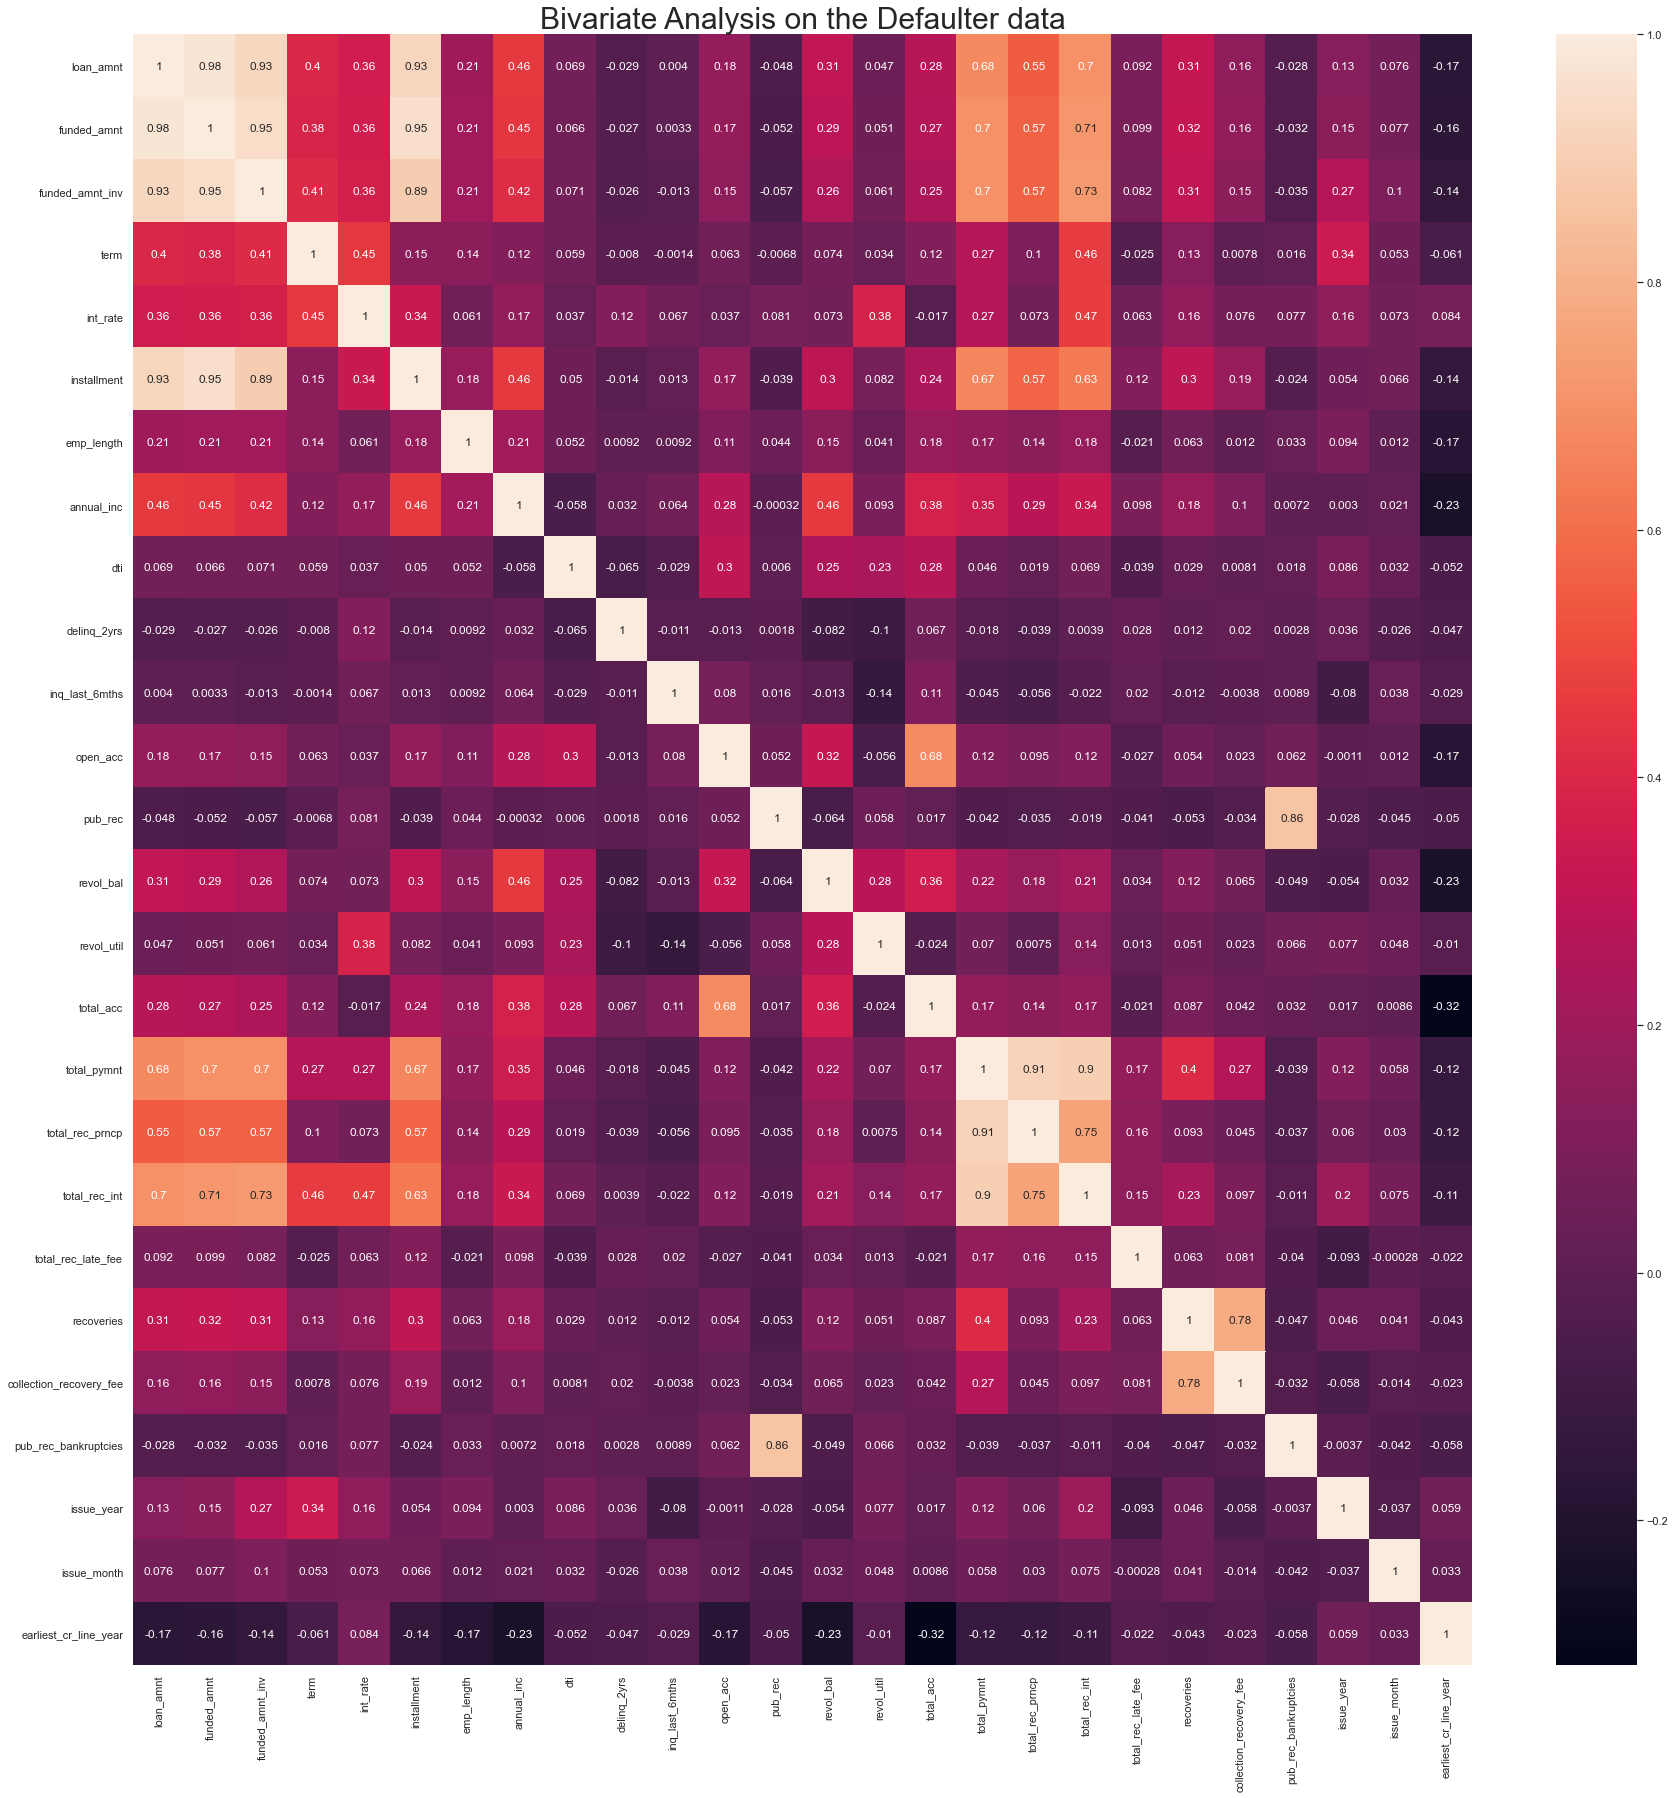

In [284]:
plt.figure(figsize=(30,30))
plt.title('Bivariate Analysis on the Defaulter data',fontdict={"fontsize":30})
ax = sns.heatmap(corr_df,annot=True)
plt.savefig("Lending_Bivariate.png", dpi=300)
plt.show()

### Key Inferences from this correlation matrix 

1. loan_amount and recoveries are directly correlated , increasing loanamount can lead to defaults/recoveries. Same as oberved from our segmented univariate analysis
2. Term of the loan is directly correlated with interest rate,amount funded.
3. Interest rate for a loan inceases with revolving_credit utiltization.
4. The more the annual income the higher the utilisation of revolving credit
5. Higher DebtToIncome ratio is prompting higher revolving credit balance utiltisation. Probability of loan default is higher, when these three variables are on higher side.